## PROJECT - Telecom Churn
#### Business Objective: Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features.

#### Importing Necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn=pd.read_csv("Churn.csv")
churn.head(29)

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
5,6,AL,area_code_510,118,no,0,yes,6.3,6,1.70,...,98,37.98,220.6,101,18.75,203.9,118,9.18,0,no
6,7,MA,area_code_510,121,yes,24,no,7.5,7,2.03,...,88,37.09,348.5,108,29.62,212.6,118,9.57,3,no
7,8,MO,area_code_415,147,no,0,yes,7.1,6,1.92,...,79,26.69,103.1,94,8.76,211.8,96,9.53,0,no
8,9,LA,area_code_408,117,no,0,no,8.7,4,2.35,...,97,31.37,351.6,80,29.89,215.8,90,9.71,1,no
9,10,WV,area_code_415,141,yes,37,yes,11.2,5,3.02,...,84,43.96,222,111,18.87,326.4,97,14.69,0,no


### EDA

In [3]:
churn.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [4]:
churn.shape

(5000, 21)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [6]:
churn.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [7]:
churn.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,1443.520003,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,2500.500000,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3750.250000,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [8]:
churn['state'].value_counts().index

Index(['WV', 'MN', 'AL', 'ID', 'VA', 'OH', 'TX', 'WY', 'NY', 'OR', 'NJ', 'UT',
       'WI', 'MI', 'ME', 'MA', 'MD', 'VT', 'MT', 'RI', 'KY', 'MS', 'CT', 'KS',
       'WA', 'IN', 'CO', 'NH', 'DE', 'MO', 'AR', 'NM', 'NC', 'SC', 'FL', 'NV',
       'OK', 'TN', 'AZ', 'DC', 'IL', 'NE', 'ND', 'HI', 'SD', 'GA', 'LA', 'PA',
       'AK', 'IA', 'CA'],
      dtype='object')

In [9]:
churn['churn'].value_counts()

no     4293
yes     707
Name: churn, dtype: int64

In [10]:
churn['area.code'].value_counts()

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area.code, dtype: int64

In [11]:
churn.isnull().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

No Null Values present

<AxesSubplot:>

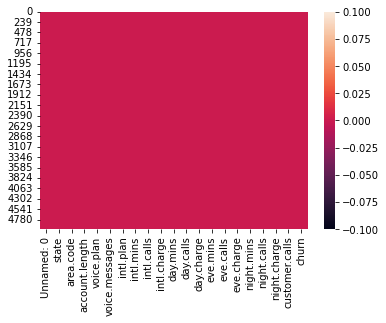

In [12]:
sns.heatmap(churn.isnull())

In [13]:
churn[churn.duplicated()]

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


No Duplicate values present

In [14]:
# Dropping Unwanted Columns
churn1=churn.drop(['Unnamed: 0',],axis=1)
churn1.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [15]:
# Renaming the data
churn1.columns=['state','area_code','account_length','voice_plan','voice_messages','intl_plan','intl_mins','intl_calls','ints_charge','days_mins','day_calls','day_charge','eve_mins','eve_calls','eve_charge','night_mins','night_calls','night_charge','customer_calls','churn']
churn1

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [16]:
# customer who churn yes
churn1.loc[churn['churn']=='yes']

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
10,IN,area_code_415,65,no,0,no,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,yes
15,NY,area_code_415,161,no,0,no,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,yes
21,CO,area_code_408,77,no,0,no,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,yes
33,AZ,area_code_408,12,no,0,no,11.8,3,3.19,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,1,yes
41,MD,area_code_408,135,yes,41,yes,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,NM,area_code_408,137,no,0,yes,10.6,2,2.86,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,1,yes
4980,WA,area_code_408,73,no,0,no,12.3,2,3.32,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,3,yes
4990,ND,area_code_510,140,no,0,no,7.5,6,2.03,244.7,115,41.6,258.6,101,21.98,231.3,112,10.41,1,yes
4991,AZ,area_code_510,97,no,0,no,8.8,5,2.38,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,1,yes


In [17]:
# customer who churn no
churn1.loc[churn['churn']=='no']

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0,no,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,no
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [18]:
churn1.corr()

,account_length,voice_messages,intl_mins,intl_calls,ints_charge,days_mins,day_calls,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
account_length,1.000000,-0.014575,0.001291,0.014277,0.001292,-0.001017,0.028240,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445
voice_messages,-0.014575,1.000000,0.002463,0.000124,0.002505,0.005381,0.000883,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086
intl_mins,0.001291,0.002463,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122
intl_calls,0.014277,0.000124,0.016791,1.000000,0.016900,-0.001303,0.010893,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147
ints_charge,0.001292,0.002505,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180
days_mins,-0.001017,0.005381,-0.019486,-0.001303,-0.019415,1.000000,0.001935,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733
day_calls,0.028240,0.000883,0.013097,0.010893,0.013161,0.001935,1.000000,0.003754,-0.000695,0.002804,-0.008308,0.002802,-0.010739
eve_calls,0.009143,-0.003954,-0.007458,0.005574,-0.007507,0.008128,0.003754,1.000000,0.002778,0.001781,-0.013682,0.001799,0.006235
eve_charge,-0.009587,0.019496,0.000132,0.008393,0.000155,-0.010760,-0.000695,0.002778,1.000000,-0.016649,0.013422,-0.016652,-0.013836
night_mins,0.000668,0.005541,-0.006721,-0.017214,-0.006655,0.011799,0.002804,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.008533


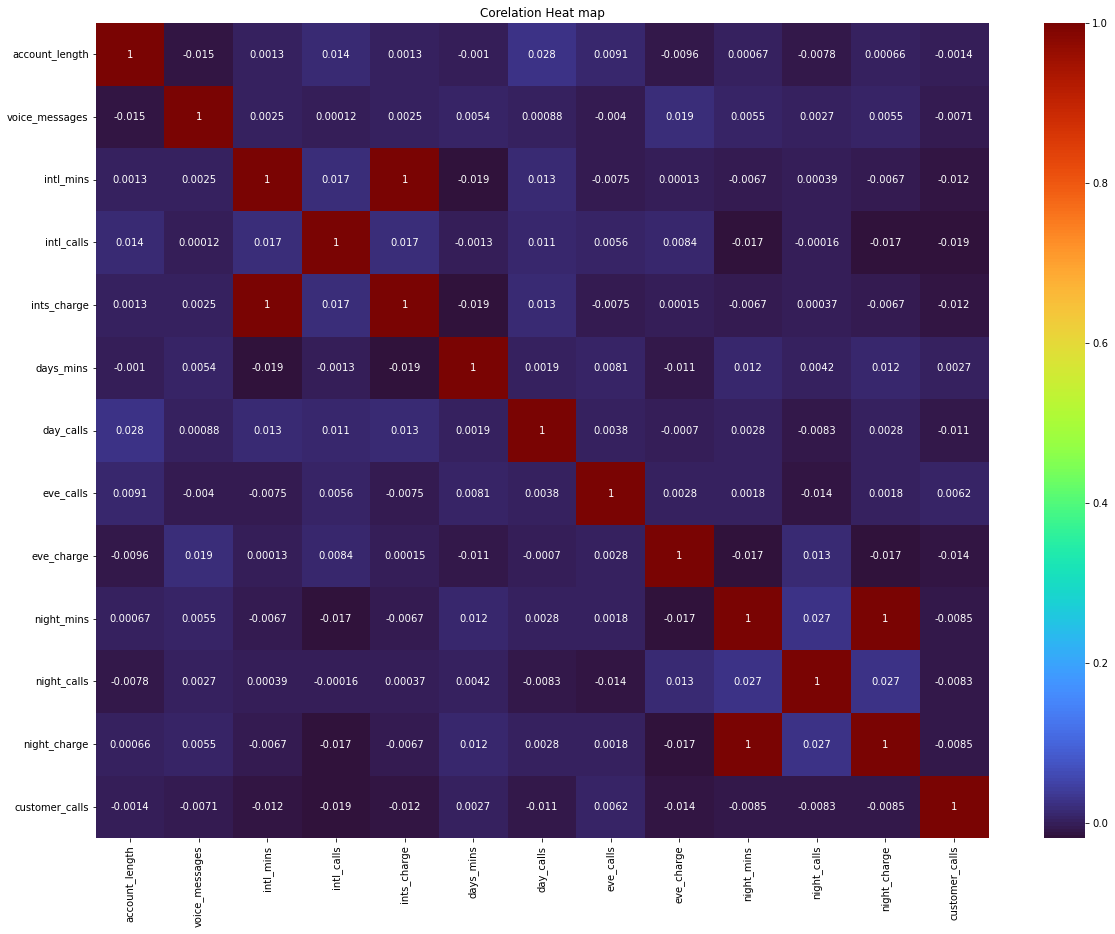

In [19]:
data=churn1.corr()
plt.figure(figsize=(20,15))
plt.title('Corelation Heat map')
sns.heatmap(data,annot=True,cmap='turbo')
plt.show()

In [20]:
# Using Label Encoder to change Categorical value into Numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
churn1['state']=le.fit_transform(churn1['voice_plan'])
churn1['area_code']=le.fit_transform(churn1['voice_plan'])
churn1['voice_plan']=le.fit_transform(churn1['voice_plan'])
churn1['intl_plan']=le.fit_transform(churn1['intl_plan'])
churn1['churn']=le.fit_transform(churn1['churn'])
churn1.head(10)

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,1,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,0,0,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,0,0,84,0,0,1,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,0
4,0,0,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
5,0,0,118,0,0,1,6.3,6,1.70,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,0,0
6,1,1,121,1,24,0,7.5,7,2.03,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,3,0
7,0,0,147,0,0,1,7.1,6,1.92,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,0,0
8,0,0,117,0,0,0,8.7,4,2.35,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,1,0
9,1,1,141,1,37,1,11.2,5,3.02,258.6,84,43.96,222,111,18.87,326.4,97,14.69,0,0


In [21]:
churn1.columns

Index(['state', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'ints_charge', 'days_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn'],
      dtype='object')

In [22]:
churn1.dtypes

state               int32
area_code           int32
account_length      int64
voice_plan          int32
voice_messages      int64
intl_plan           int32
intl_mins         float64
intl_calls          int64
ints_charge       float64
days_mins         float64
day_calls           int64
day_charge         object
eve_mins           object
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
customer_calls      int64
churn               int32
dtype: object

As from the above dytpes we can see that day_charge and eve_mins are still object and are unable to plot them in graph.

In [23]:
churn1['day_charge'].astype

<bound method NDFrame.astype of 0       45.07
1       27.47
2       41.38
3        50.9
4       28.34
        ...  
4995    40.07
4996    31.31
4997     23.9
4998     32.1
4999       22
Name: day_charge, Length: 5000, dtype: object>

In [24]:
# Changing the object(day_charge and eve_mins) into int(day_charge and eve_mins)
churn1['day_charge']=churn1['day_charge'].fillna(0).astype(float)

In [25]:
churn1['day_charge']=churn1['day_charge'].fillna(0).astype(int)

In [26]:
churn1['day_charge'].astype

<bound method NDFrame.astype of 0       45
1       27
2       41
3       50
4       28
        ..
4995    40
4996    31
4997    23
4998    32
4999    22
Name: day_charge, Length: 5000, dtype: int32>

Here we change object day_charge into integer day_charge

In [27]:
churn1['eve_mins'].astype

<bound method NDFrame.astype of 0       197.4
1       195.5
2       121.2
3        61.9
4       148.3
        ...  
4995      223
4996    256.8
4997    172.8
4998    171.7
4999    267.1
Name: eve_mins, Length: 5000, dtype: object>

In [28]:
churn1['eve_mins']=churn1['eve_mins'].fillna(0).astype(float)

In [29]:
churn1['eve_mins']=churn1['eve_mins'].fillna(0).astype(int)

In [30]:
churn1['eve_mins'].astype

<bound method NDFrame.astype of 0       197
1       195
2       121
3        61
4       148
       ... 
4995    223
4996    256
4997    172
4998    171
4999    267
Name: eve_mins, Length: 5000, dtype: int32>

Here the data is changed to int

In [31]:
churn.isnull().any()

Unnamed: 0        False
state             False
area.code         False
account.length    False
voice.plan        False
voice.messages    False
intl.plan         False
intl.mins         False
intl.calls        False
intl.charge       False
day.mins          False
day.calls         False
day.charge        False
eve.mins          False
eve.calls         False
eve.charge        False
night.mins        False
night.calls       False
night.charge      False
customer.calls    False
churn             False
dtype: bool

We have removed the missing values as well using fillna

In [32]:
churn1['churn'].value_counts()

0    4293
1     707
Name: churn, dtype: int64

Since the data is unbalanced we need to balance the data.

### Data Visualization

Here the dependent variable is churn and the remaining are independent variable

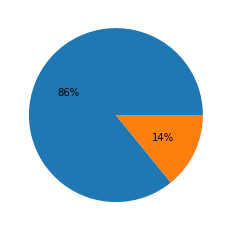

In [33]:
plt.pie(churn1['churn'].value_counts(),autopct='%.0f%%')
plt.show()

Here the 14% Of the data is people who have churn and rest 14% belong to not churn people

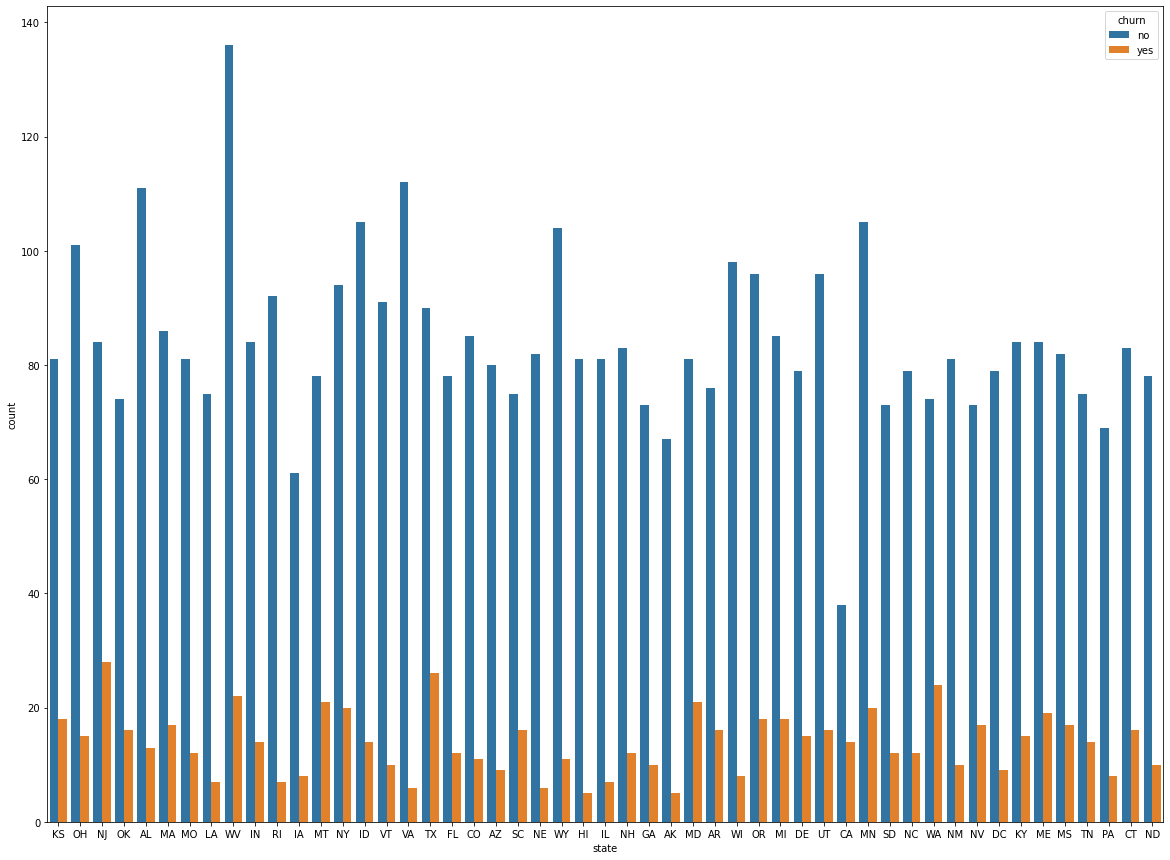

In [34]:
# Taking state data 
plt.figure(figsize=(20,15))
sns.countplot(x='state',hue ='churn',data=churn)
plt.show()

In [35]:
# Taking Percentage of the above data vs churn rate
per_state= pd.crosstab(churn['state'],churn['churn'])
per_state['Percentage'] = per_state.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
per_state

churn,no,yes,Percentage
state,,,
AK,67,5,6.944444
AL,111,13,10.483871
AR,76,16,17.391304
AZ,80,9,10.112360
CA,38,14,26.923077
CO,85,11,11.458333
CT,83,16,16.161616
DC,79,9,10.227273
DE,79,15,15.957447


 From the above data ca,nj,wa... are the state with higest churn percentage

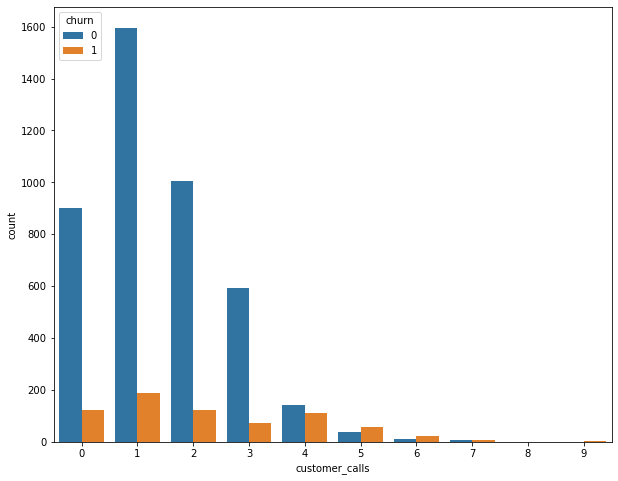

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(x='customer_calls',hue ='churn',data=churn1)
plt.show()

More the customer care call more the churn rate

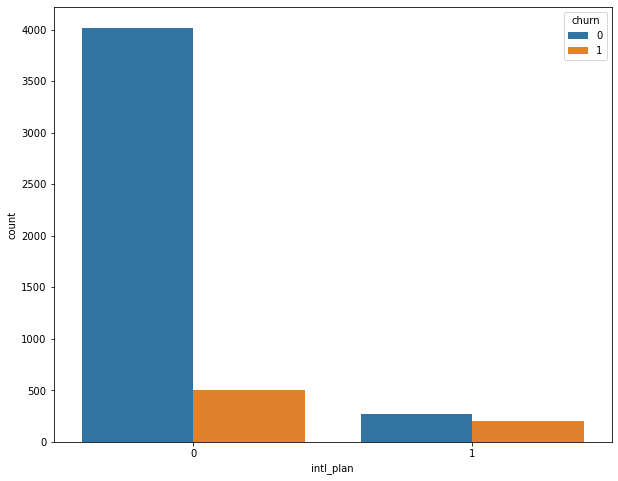

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x='intl_plan',hue ='churn',data=churn1)
plt.show()

Customer who chose international plan have the greater chance to churn when comparing to the customer 
who haven't choose the international plan

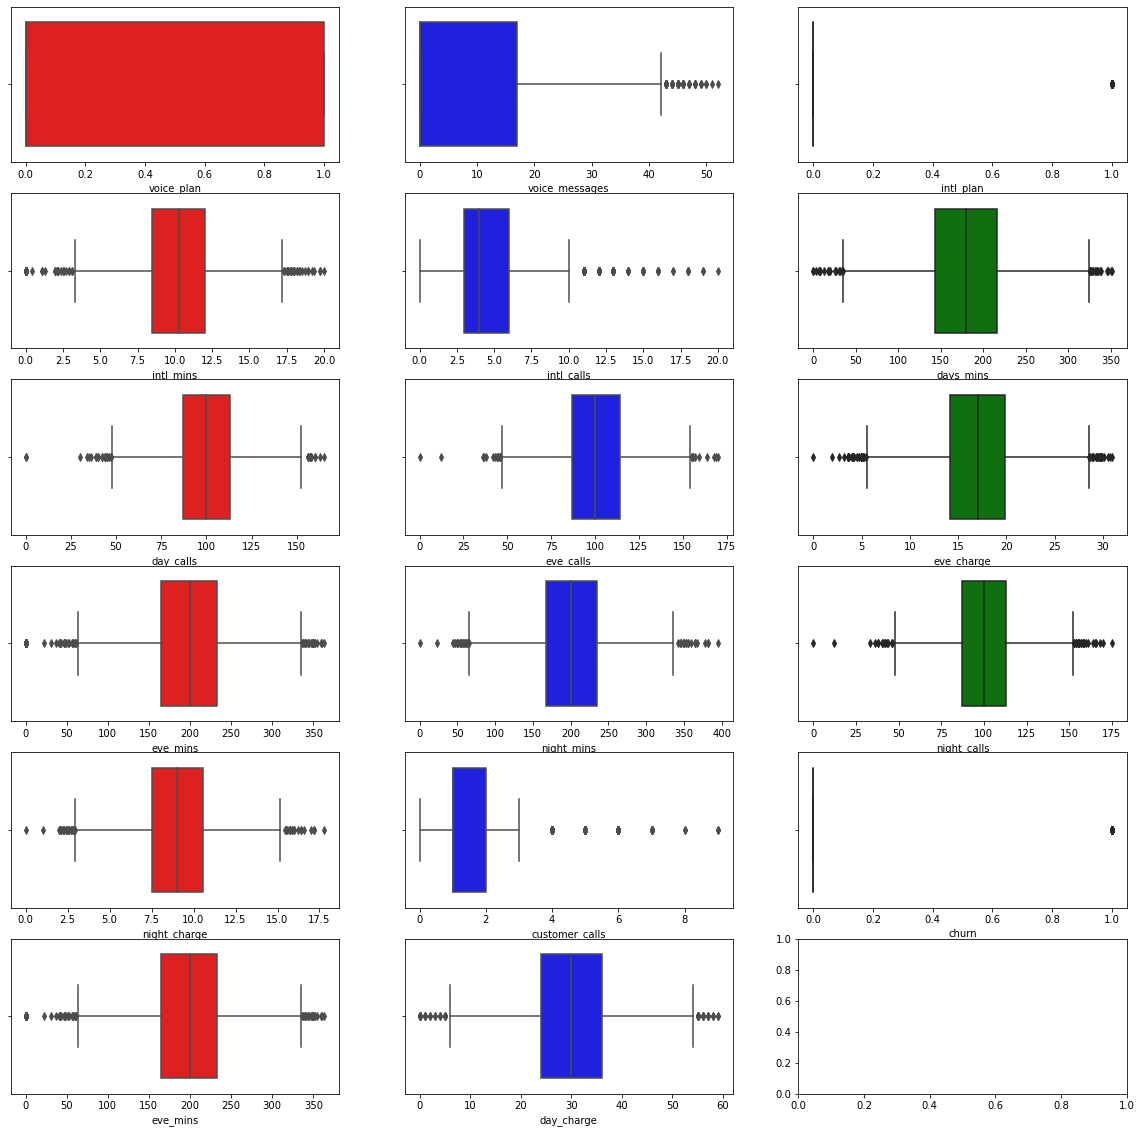

In [38]:
# Taking box plot to identify the outliers

fig,ax=plt.subplots(6,3,figsize=(20,20))

sns.boxplot(churn1['voice_plan'],ax=ax[0,0],color='red')
sns.boxplot(churn1['voice_messages'],ax=ax[0,1],color='blue')
sns.boxplot(churn1['intl_plan'],ax=ax[0,2],color='green')
sns.boxplot(churn1['intl_mins'],ax=ax[1,0],color='red')
sns.boxplot(churn1['intl_calls'],ax=ax[1,1],color='blue')
sns.boxplot(churn1['days_mins'],ax=ax[1,2],color='green')
sns.boxplot(churn1['day_calls'],ax=ax[2,0],color='red')
sns.boxplot(churn1['eve_calls'],ax=ax[2,1],color='blue')
sns.boxplot(churn1['eve_charge'],ax=ax[2,2],color='green')
sns.boxplot(churn1['eve_mins'],ax=ax[3,0],color='red')
sns.boxplot(churn1['night_mins'],ax=ax[3,1],color='blue')
sns.boxplot(churn1['night_calls'],ax=ax[3,2],color='green')
sns.boxplot(churn1['night_charge'],ax=ax[4,0],color='red')
sns.boxplot(churn1['customer_calls'],ax=ax[4,1],color='blue')
sns.boxplot(churn1['churn'],ax=ax[4,2],color='green')
sns.boxplot(churn1['eve_mins'],ax=ax[5,0],color='red')
sns.boxplot(churn1['day_charge'],ax=ax[5,1],color='blue')


plt.show()

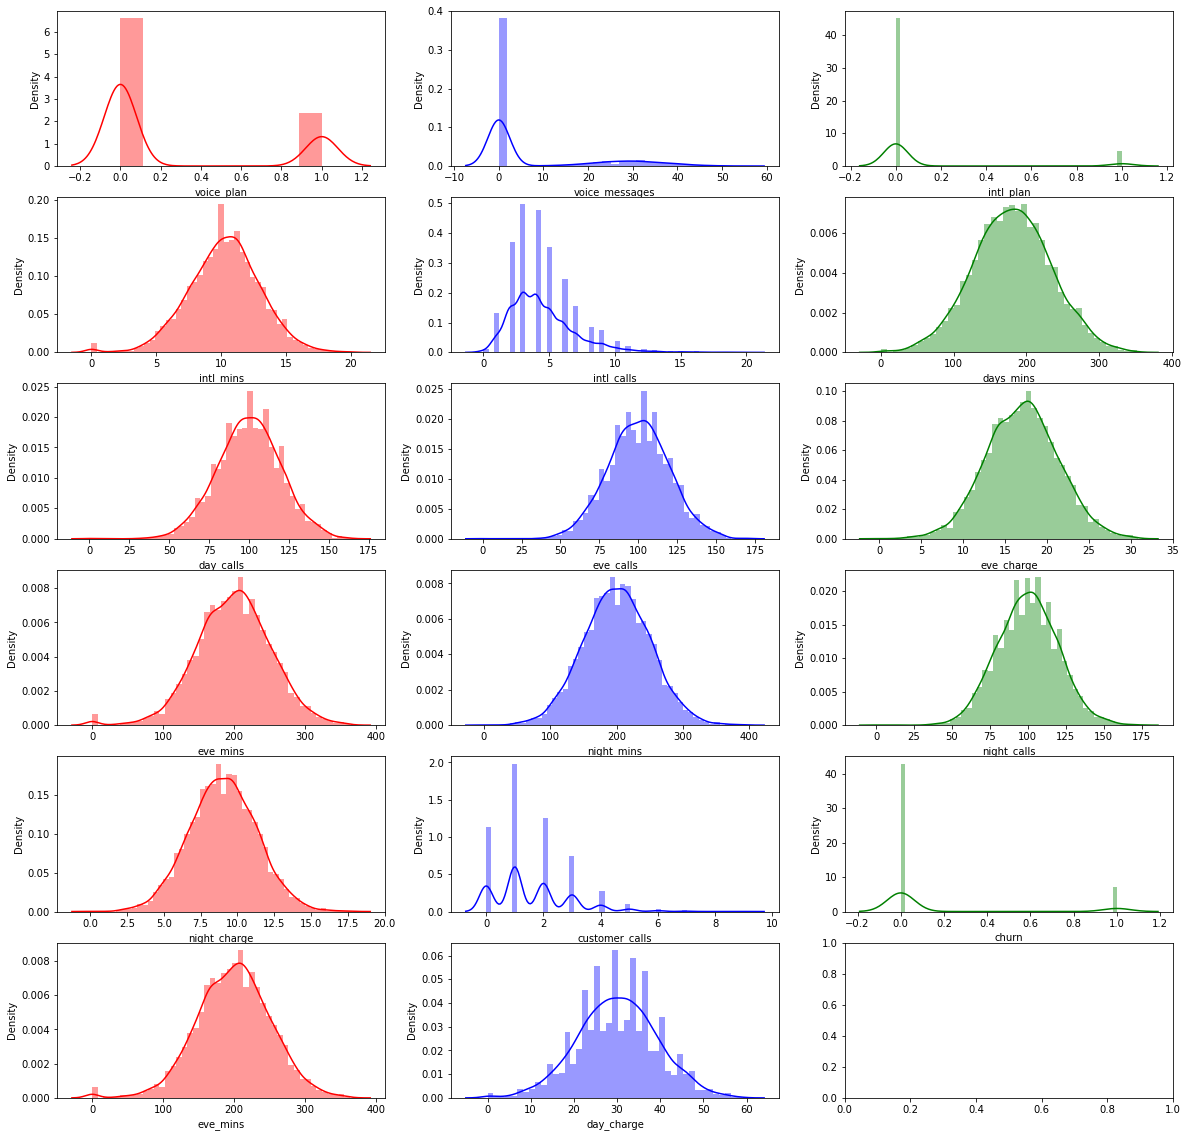

In [39]:
# Taking distplot to understand data distribution 

fig,ax=plt.subplots(6,3,figsize=(20,20))

sns.distplot(churn1['voice_plan'],ax=ax[0,0],color='red')
sns.distplot(churn1['voice_messages'],ax=ax[0,1],color='blue')
sns.distplot(churn1['intl_plan'],ax=ax[0,2],color='green')
sns.distplot(churn1['intl_mins'],ax=ax[1,0],color='red')
sns.distplot(churn1['intl_calls'],ax=ax[1,1],color='blue')
sns.distplot(churn1['days_mins'],ax=ax[1,2],color='green')
sns.distplot(churn1['day_calls'],ax=ax[2,0],color='red')
sns.distplot(churn1['eve_calls'],ax=ax[2,1],color='blue')
sns.distplot(churn1['eve_charge'],ax=ax[2,2],color='green')
sns.distplot(churn1['eve_mins'],ax=ax[3,0],color='red')
sns.distplot(churn1['night_mins'],ax=ax[3,1],color='blue')
sns.distplot(churn1['night_calls'],ax=ax[3,2],color='green')
sns.distplot(churn1['night_charge'],ax=ax[4,0],color='red')
sns.distplot(churn1['customer_calls'],ax=ax[4,1],color='blue')
sns.distplot(churn1['churn'],ax=ax[4,2],color='green')
sns.distplot(churn1['eve_mins'],ax=ax[5,0],color='red')
sns.distplot(churn1['day_charge'],ax=ax[5,1],color='blue')


plt.show()

In [40]:
#sns.pairplot(churn1)

### Detecting And Removing Outliers Using IQR Method

Here we take intl_calls,costumer_calls,night_charge and eve_calls for outlier 
removal because these variables which 

#### Taking intl_calls for removing outliers

In [41]:
Q1=churn1['intl_calls'].quantile(0.25)
Q3=churn1['intl_calls'].quantile(0.75)
Q1,Q3

(3.0, 6.0)

In [42]:
IQR=Q3-Q1
IQR

3.0

In [43]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-1.5, 10.5)

In [44]:
# Detecting the outliers
churn1[(churn1['intl_calls']<lower_limit)|(churn1['intl_calls']>upper_limit)]


,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
22,0,0,130,0,0,0,9.5,19,2.57,183.0,112,31,72,99,6.20,181.8,78,8.18,0,0
41,1,1,135,1,41,1,14.6,15,3.94,173.1,85,29,203,107,17.33,122.2,78,5.50,0,1
153,0,0,56,0,0,0,6.9,11,1.86,226.0,112,38,248,118,21.12,140.5,142,6.32,1,0
182,1,1,67,1,36,0,9.9,12,2.67,115.6,111,19,237,94,20.20,169.9,103,7.65,2,0
185,0,0,73,0,0,0,10.8,13,2.92,214.3,145,36,268,135,22.82,241.2,92,10.85,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,0,0,45,0,0,0,12.0,11,3.24,142.7,80,24,205,135,17.46,228.1,87,10.26,2,0
4877,0,0,133,0,0,0,11.2,11,3.02,165.9,98,28,161,110,13.76,208.9,120,9.40,2,0
4917,0,0,38,0,0,1,14.1,11,3.81,211.6,87,35,106,68,9.09,239.2,99,10.76,0,1
4955,0,0,88,0,0,0,2.0,11,0.54,204.8,100,34,193,98,16.48,190.9,62,8.59,1,0


In [45]:
# Removing the outliers
churn2=churn1[(churn1['intl_calls']>lower_limit)&(churn1['intl_calls']<upper_limit)]
churn2

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,1,128,1,25,0,10.0,3,2.70,265.1,110,45,197,99,16.78,244.7,91,11.01,1,0
1,1,1,107,1,26,0,13.7,3,3.70,161.6,123,27,195,103,16.62,254.4,103,11.45,1,0
2,0,0,137,0,0,0,12.2,5,3.29,243.4,114,41,121,110,10.30,162.6,104,7.32,0,0
3,0,0,84,0,0,1,6.6,7,1.78,299.4,71,50,61,88,5.26,196.9,89,8.86,2,0
4,0,0,75,0,0,1,10.1,3,2.73,166.7,113,28,148,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,0,75,0,0,0,6.9,7,1.86,170.7,101,29,193,126,16.41,129.1,104,5.81,1,0
4995,1,1,50,1,40,0,9.9,5,2.67,235.7,127,40,223,126,18.96,297.5,116,13.39,2,0
4996,0,0,152,0,0,0,14.7,2,3.97,184.2,90,31,256,73,21.83,213.6,113,9.61,3,1
4997,0,0,61,0,0,0,13.6,4,3.67,140.6,89,23,172,128,14.69,212.4,97,9.56,1,0


#### Taking customer_calls for removing outliers

In [46]:
Q1=churn1['customer_calls'].quantile(0.25)
Q3=churn1['customer_calls'].quantile(0.75)
Q1,Q3

(1.0, 2.0)

In [47]:
IQR=Q3-Q1
IQR

1.0

In [48]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-0.5, 3.5)

In [49]:
# Detecting the outliers
churn1[(churn1['customer_calls']<lower_limit)|(churn1['customer_calls']>upper_limit)]

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
10,0,0,65,0,0,0,12.7,6,3.43,129.1,137,21,228,83,19.42,208.8,111,9.40,4,1
14,0,0,62,0,0,0,13.1,6,3.54,120.7,70,20,307,76,26.11,203.0,99,9.14,4,0
15,0,0,161,0,0,0,5.4,9,1.46,332.9,67,56,317,97,27.01,160.6,128,7.23,4,1
21,0,0,77,0,0,0,5.7,6,1.54,62.4,89,10,169,121,14.44,209.6,64,9.43,5,1
48,0,0,119,0,0,0,8.8,3,2.38,159.1,114,27,231,117,19.66,143.2,91,6.44,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,0,0,120,0,0,0,8.3,10,2.24,198.0,101,33,190,74,16.17,241.2,105,10.85,4,0
4939,0,0,30,0,0,0,11.3,7,3.05,112.9,81,19,224,68,19.11,188.4,122,8.48,4,1
4947,0,0,50,0,0,0,10.5,5,2.84,198.7,114,33,141,90,12.03,293.0,79,13.18,4,0
4953,0,0,90,0,0,0,8.7,5,2.35,104.0,104,17,170,106,14.53,158.8,99,7.15,4,1


In [50]:
# Removing the outliers
churn3=churn1[(churn1['customer_calls']>lower_limit)&(churn1['customer_calls']<upper_limit)]
churn3

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,1,128,1,25,0,10.0,3,2.70,265.1,110,45,197,99,16.78,244.7,91,11.01,1,0
1,1,1,107,1,26,0,13.7,3,3.70,161.6,123,27,195,103,16.62,254.4,103,11.45,1,0
2,0,0,137,0,0,0,12.2,5,3.29,243.4,114,41,121,110,10.30,162.6,104,7.32,0,0
3,0,0,84,0,0,1,6.6,7,1.78,299.4,71,50,61,88,5.26,196.9,89,8.86,2,0
4,0,0,75,0,0,1,10.1,3,2.73,166.7,113,28,148,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,50,1,40,0,9.9,5,2.67,235.7,127,40,223,126,18.96,297.5,116,13.39,2,0
4996,0,0,152,0,0,0,14.7,2,3.97,184.2,90,31,256,73,21.83,213.6,113,9.61,3,1
4997,0,0,61,0,0,0,13.6,4,3.67,140.6,89,23,172,128,14.69,212.4,97,9.56,1,0
4998,0,0,109,0,0,0,8.5,6,2.30,188.8,67,32,171,92,14.59,224.4,89,10.10,0,0


#### Taking night_charge for removing outliers

In [51]:
Q1=churn1['night_charge'].quantile(0.25)
Q3=churn1['night_charge'].quantile(0.75)
Q1,Q3

(7.51, 10.56)

In [52]:
IQR=Q3-Q1
IQR

3.0500000000000007

In [53]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(2.9349999999999987, 15.135000000000002)

In [54]:
# Detecting the outliers
churn1[(churn1['night_charge']<lower_limit)|(churn1['night_charge']>upper_limit)]

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
116,0,0,64,0,0,0,14.2,3,3.83,162.6,83,27,152,109,12.95,57.5,122,2.59,1,0
244,0,0,108,0,0,0,9.4,3,2.54,198.5,99,33,267,60,22.76,354.9,75,15.97,0,1
444,0,0,85,0,0,1,9.6,7,2.59,165.4,107,28,196,126,16.66,349.2,110,15.71,2,0
862,1,1,75,1,38,0,13.1,3,3.54,163.6,132,27,146,113,12.47,345.8,115,15.56,3,0
883,0,0,42,0,0,0,8.0,12,2.16,146.3,84,24,255,113,21.75,45.0,117,2.03,1,0
918,0,0,52,0,0,0,5.2,2,1.40,215.9,67,36,217,108,18.45,342.8,130,15.43,1,0
922,0,0,80,0,0,0,9.3,5,2.51,239.9,121,40,142,51,12.10,364.3,106,16.39,1,0
992,1,1,45,1,26,0,7.7,5,2.08,91.7,104,15,150,119,12.80,63.3,103,2.85,1,0
999,0,0,165,0,0,0,7.9,3,2.13,207.7,109,35,164,94,14.01,54.5,91,2.45,0,0
1072,1,1,164,1,25,0,14.3,6,3.86,219.1,88,37,151,99,12.88,50.1,60,2.25,1,0


In [55]:
# Removing the outliers
churn2=churn1[(churn1['night_charge']>lower_limit)&(churn1['night_charge']<upper_limit)]
churn2

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,1,128,1,25,0,10.0,3,2.70,265.1,110,45,197,99,16.78,244.7,91,11.01,1,0
1,1,1,107,1,26,0,13.7,3,3.70,161.6,123,27,195,103,16.62,254.4,103,11.45,1,0
2,0,0,137,0,0,0,12.2,5,3.29,243.4,114,41,121,110,10.30,162.6,104,7.32,0,0
3,0,0,84,0,0,1,6.6,7,1.78,299.4,71,50,61,88,5.26,196.9,89,8.86,2,0
4,0,0,75,0,0,1,10.1,3,2.73,166.7,113,28,148,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,50,1,40,0,9.9,5,2.67,235.7,127,40,223,126,18.96,297.5,116,13.39,2,0
4996,0,0,152,0,0,0,14.7,2,3.97,184.2,90,31,256,73,21.83,213.6,113,9.61,3,1
4997,0,0,61,0,0,0,13.6,4,3.67,140.6,89,23,172,128,14.69,212.4,97,9.56,1,0
4998,0,0,109,0,0,0,8.5,6,2.30,188.8,67,32,171,92,14.59,224.4,89,10.10,0,0


#### Taking eve_mins for removing outliers

In [56]:
Q1=churn1['eve_mins'].quantile(0.25)
Q3=churn1['eve_mins'].quantile(0.75)
Q1,Q3

(165.0, 233.0)

In [57]:
IQR=Q3-Q1
IQR

68.0

In [58]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(63.0, 335.0)

In [59]:
# Detecting the outliers
churn1[(churn1['eve_mins']<lower_limit)|(churn1['eve_mins']>upper_limit)]

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
3,0,0,84,0,0,1,6.6,7,1.78,299.4,71,50,61,88,5.26,196.9,89,8.86,2,0
6,1,1,121,1,24,0,7.5,7,2.03,218.2,88,37,348,108,29.62,212.6,118,9.57,3,0
8,0,0,117,0,0,0,8.7,4,2.35,184.5,97,31,351,80,29.89,215.8,90,9.71,1,0
32,0,0,172,0,0,0,12.6,10,3.40,212.0,121,36,31,115,2.65,293.3,78,13.20,3,0
89,0,0,128,0,0,0,13.9,4,3.75,237.9,125,40,0,93,21.05,208.9,68,9.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564,0,0,145,0,0,0,6.2,6,1.67,158.8,120,27,352,145,29.93,177.6,140,7.99,2,0
4621,0,0,117,0,0,0,8.3,2,2.24,150.5,121,25,345,132,29.33,183.9,97,8.28,0,0
4885,0,0,122,0,0,0,8.7,1,2.35,265.7,130,45,47,116,4.02,140.3,103,6.31,3,0
4892,0,0,63,0,0,0,5.6,3,1.51,6.6,107,1,359,142,30.54,252.5,131,11.36,0,0


In [60]:
# Removing the outliers
churn2=churn1[(churn1['eve_mins']>lower_limit)&(churn1['eve_mins']<upper_limit)]
churn2

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,1,128,1,25,0,10.0,3,2.70,265.1,110,45,197,99,16.78,244.7,91,11.01,1,0
1,1,1,107,1,26,0,13.7,3,3.70,161.6,123,27,195,103,16.62,254.4,103,11.45,1,0
2,0,0,137,0,0,0,12.2,5,3.29,243.4,114,41,121,110,10.30,162.6,104,7.32,0,0
4,0,0,75,0,0,1,10.1,3,2.73,166.7,113,28,148,122,12.61,186.9,121,8.41,3,0
5,0,0,118,0,0,1,6.3,6,1.70,223.4,98,37,220,101,18.75,203.9,118,9.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,50,1,40,0,9.9,5,2.67,235.7,127,40,223,126,18.96,297.5,116,13.39,2,0
4996,0,0,152,0,0,0,14.7,2,3.97,184.2,90,31,256,73,21.83,213.6,113,9.61,3,1
4997,0,0,61,0,0,0,13.6,4,3.67,140.6,89,23,172,128,14.69,212.4,97,9.56,1,0
4998,0,0,109,0,0,0,8.5,6,2.30,188.8,67,32,171,92,14.59,224.4,89,10.10,0,0


### Comparing the data after removing outliers

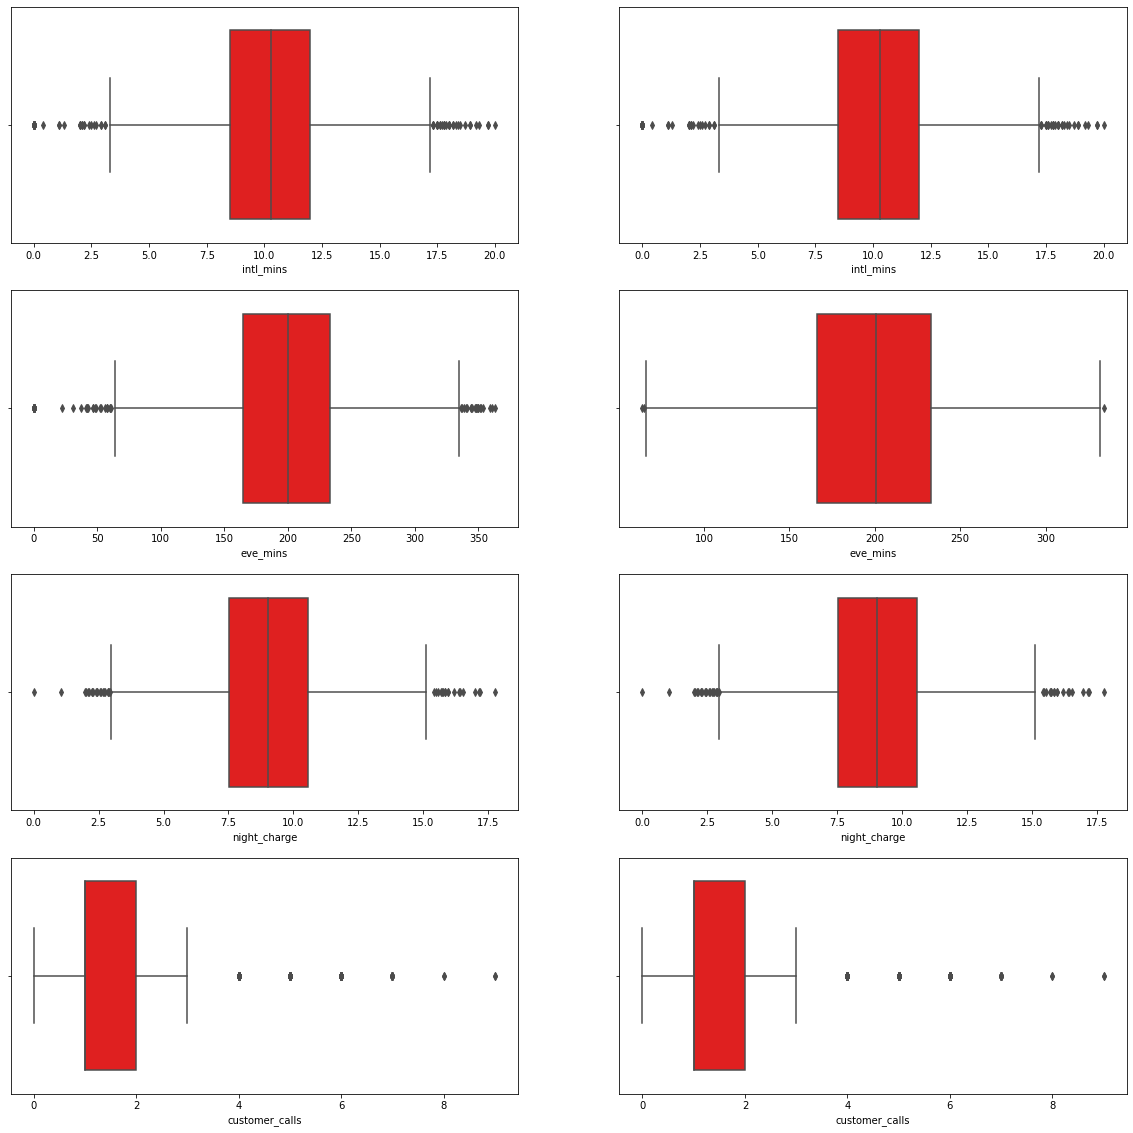

In [61]:
fig,ax=plt.subplots(4,2,figsize=(20,20))

sns.boxplot(churn1['intl_mins'],ax=ax[0,0],color='red')
sns.boxplot(churn2['intl_mins'],ax=ax[0,1],color='red')
sns.boxplot(churn1['eve_mins'],ax=ax[1,0],color='red')
sns.boxplot(churn2['eve_mins'],ax=ax[1,1],color='red')
sns.boxplot(churn1['night_charge'],ax=ax[2,0],color='red')
sns.boxplot(churn2['night_charge'],ax=ax[2,1],color='red')
sns.boxplot(churn1['customer_calls'],ax=ax[3,0],color='red')
sns.boxplot(churn2['customer_calls'],ax=ax[3,1],color='red')


plt.show()

In [62]:
churn2

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,1,128,1,25,0,10.0,3,2.70,265.1,110,45,197,99,16.78,244.7,91,11.01,1,0
1,1,1,107,1,26,0,13.7,3,3.70,161.6,123,27,195,103,16.62,254.4,103,11.45,1,0
2,0,0,137,0,0,0,12.2,5,3.29,243.4,114,41,121,110,10.30,162.6,104,7.32,0,0
4,0,0,75,0,0,1,10.1,3,2.73,166.7,113,28,148,122,12.61,186.9,121,8.41,3,0
5,0,0,118,0,0,1,6.3,6,1.70,223.4,98,37,220,101,18.75,203.9,118,9.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,50,1,40,0,9.9,5,2.67,235.7,127,40,223,126,18.96,297.5,116,13.39,2,0
4996,0,0,152,0,0,0,14.7,2,3.97,184.2,90,31,256,73,21.83,213.6,113,9.61,3,1
4997,0,0,61,0,0,0,13.6,4,3.67,140.6,89,23,172,128,14.69,212.4,97,9.56,1,0
4998,0,0,109,0,0,0,8.5,6,2.30,188.8,67,32,171,92,14.59,224.4,89,10.10,0,0


### Splitting The Data

In [63]:
x=churn2.drop('churn',axis=1)
y=churn2['churn']

### Balancing The Data

In [64]:
from collections import Counter

In [65]:
print("dependent",format(Counter(y)))

dependent Counter({0: 4236, 1: 697})


In [66]:
from imblearn.over_sampling import RandomOverSampler

In [67]:
ros=RandomOverSampler(random_state=0)
x_ros,y_ros=ros.fit_resample(x,y)

In [68]:
print("Before resample",format(Counter(y)))
print("After resample",format(Counter(y_ros)))

Before resample Counter({0: 4236, 1: 697})
After resample Counter({0: 4236, 1: 4236})


Here x_ros is the Independent Variable

y_ros is the Dependent Variable

In [69]:
x_ros.head(20)

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
0,1,1,128,1,25,0,10.0,3,2.70,265.1,110,45,197,99,16.78,244.7,91,11.01,1
1,1,1,107,1,26,0,13.7,3,3.70,161.6,123,27,195,103,16.62,254.4,103,11.45,1
2,0,0,137,0,0,0,12.2,5,3.29,243.4,114,41,121,110,10.30,162.6,104,7.32,0
3,0,0,75,0,0,1,10.1,3,2.73,166.7,113,28,148,122,12.61,186.9,121,8.41,3
4,0,0,118,0,0,1,6.3,6,1.70,223.4,98,37,220,101,18.75,203.9,118,9.18,0
5,0,0,147,0,0,1,7.1,6,1.92,157.0,79,26,103,94,8.76,211.8,96,9.53,0
6,1,1,141,1,37,1,11.2,5,3.02,258.6,84,43,222,111,18.87,326.4,97,14.69,0
7,0,0,65,0,0,0,12.7,6,3.43,129.1,137,21,228,83,19.42,208.8,111,9.40,4
8,0,0,74,0,0,0,9.1,5,2.46,187.7,127,31,163,148,13.89,196.0,94,8.82,0
9,0,0,168,0,0,0,11.2,2,3.02,128.8,96,0,104,71,8.92,141.1,128,6.35,1


In [70]:
y_ros.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    1
19    0
Name: churn, dtype: int32

### Splitting The Data

In [71]:
### Splitting Data To test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.3)

In [72]:
x_train.count()

state             5930
area_code         5930
account_length    5930
voice_plan        5930
voice_messages    5930
intl_plan         5930
intl_mins         5930
intl_calls        5930
ints_charge       5930
days_mins         5930
day_calls         5930
day_charge        5930
eve_mins          5930
eve_calls         5930
eve_charge        5930
night_mins        5930
night_calls       5930
night_charge      5930
customer_calls    5930
dtype: int64

In [73]:
x_test.count()

state             2542
area_code         2542
account_length    2542
voice_plan        2542
voice_messages    2542
intl_plan         2542
intl_mins         2542
intl_calls        2542
ints_charge       2542
days_mins         2542
day_calls         2542
day_charge        2542
eve_mins          2542
eve_calls         2542
eve_charge        2542
night_mins        2542
night_calls       2542
night_charge      2542
customer_calls    2542
dtype: int64

### Model Building Using Decision Tree

In [74]:
# Importing Libraries
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [75]:
# Model Building
model1=DecisionTreeClassifier(criterion='gini',max_depth=3)
# Fitting to training set
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [76]:
churn2.columns

Index(['state', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'ints_charge', 'days_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn'],
      dtype='object')

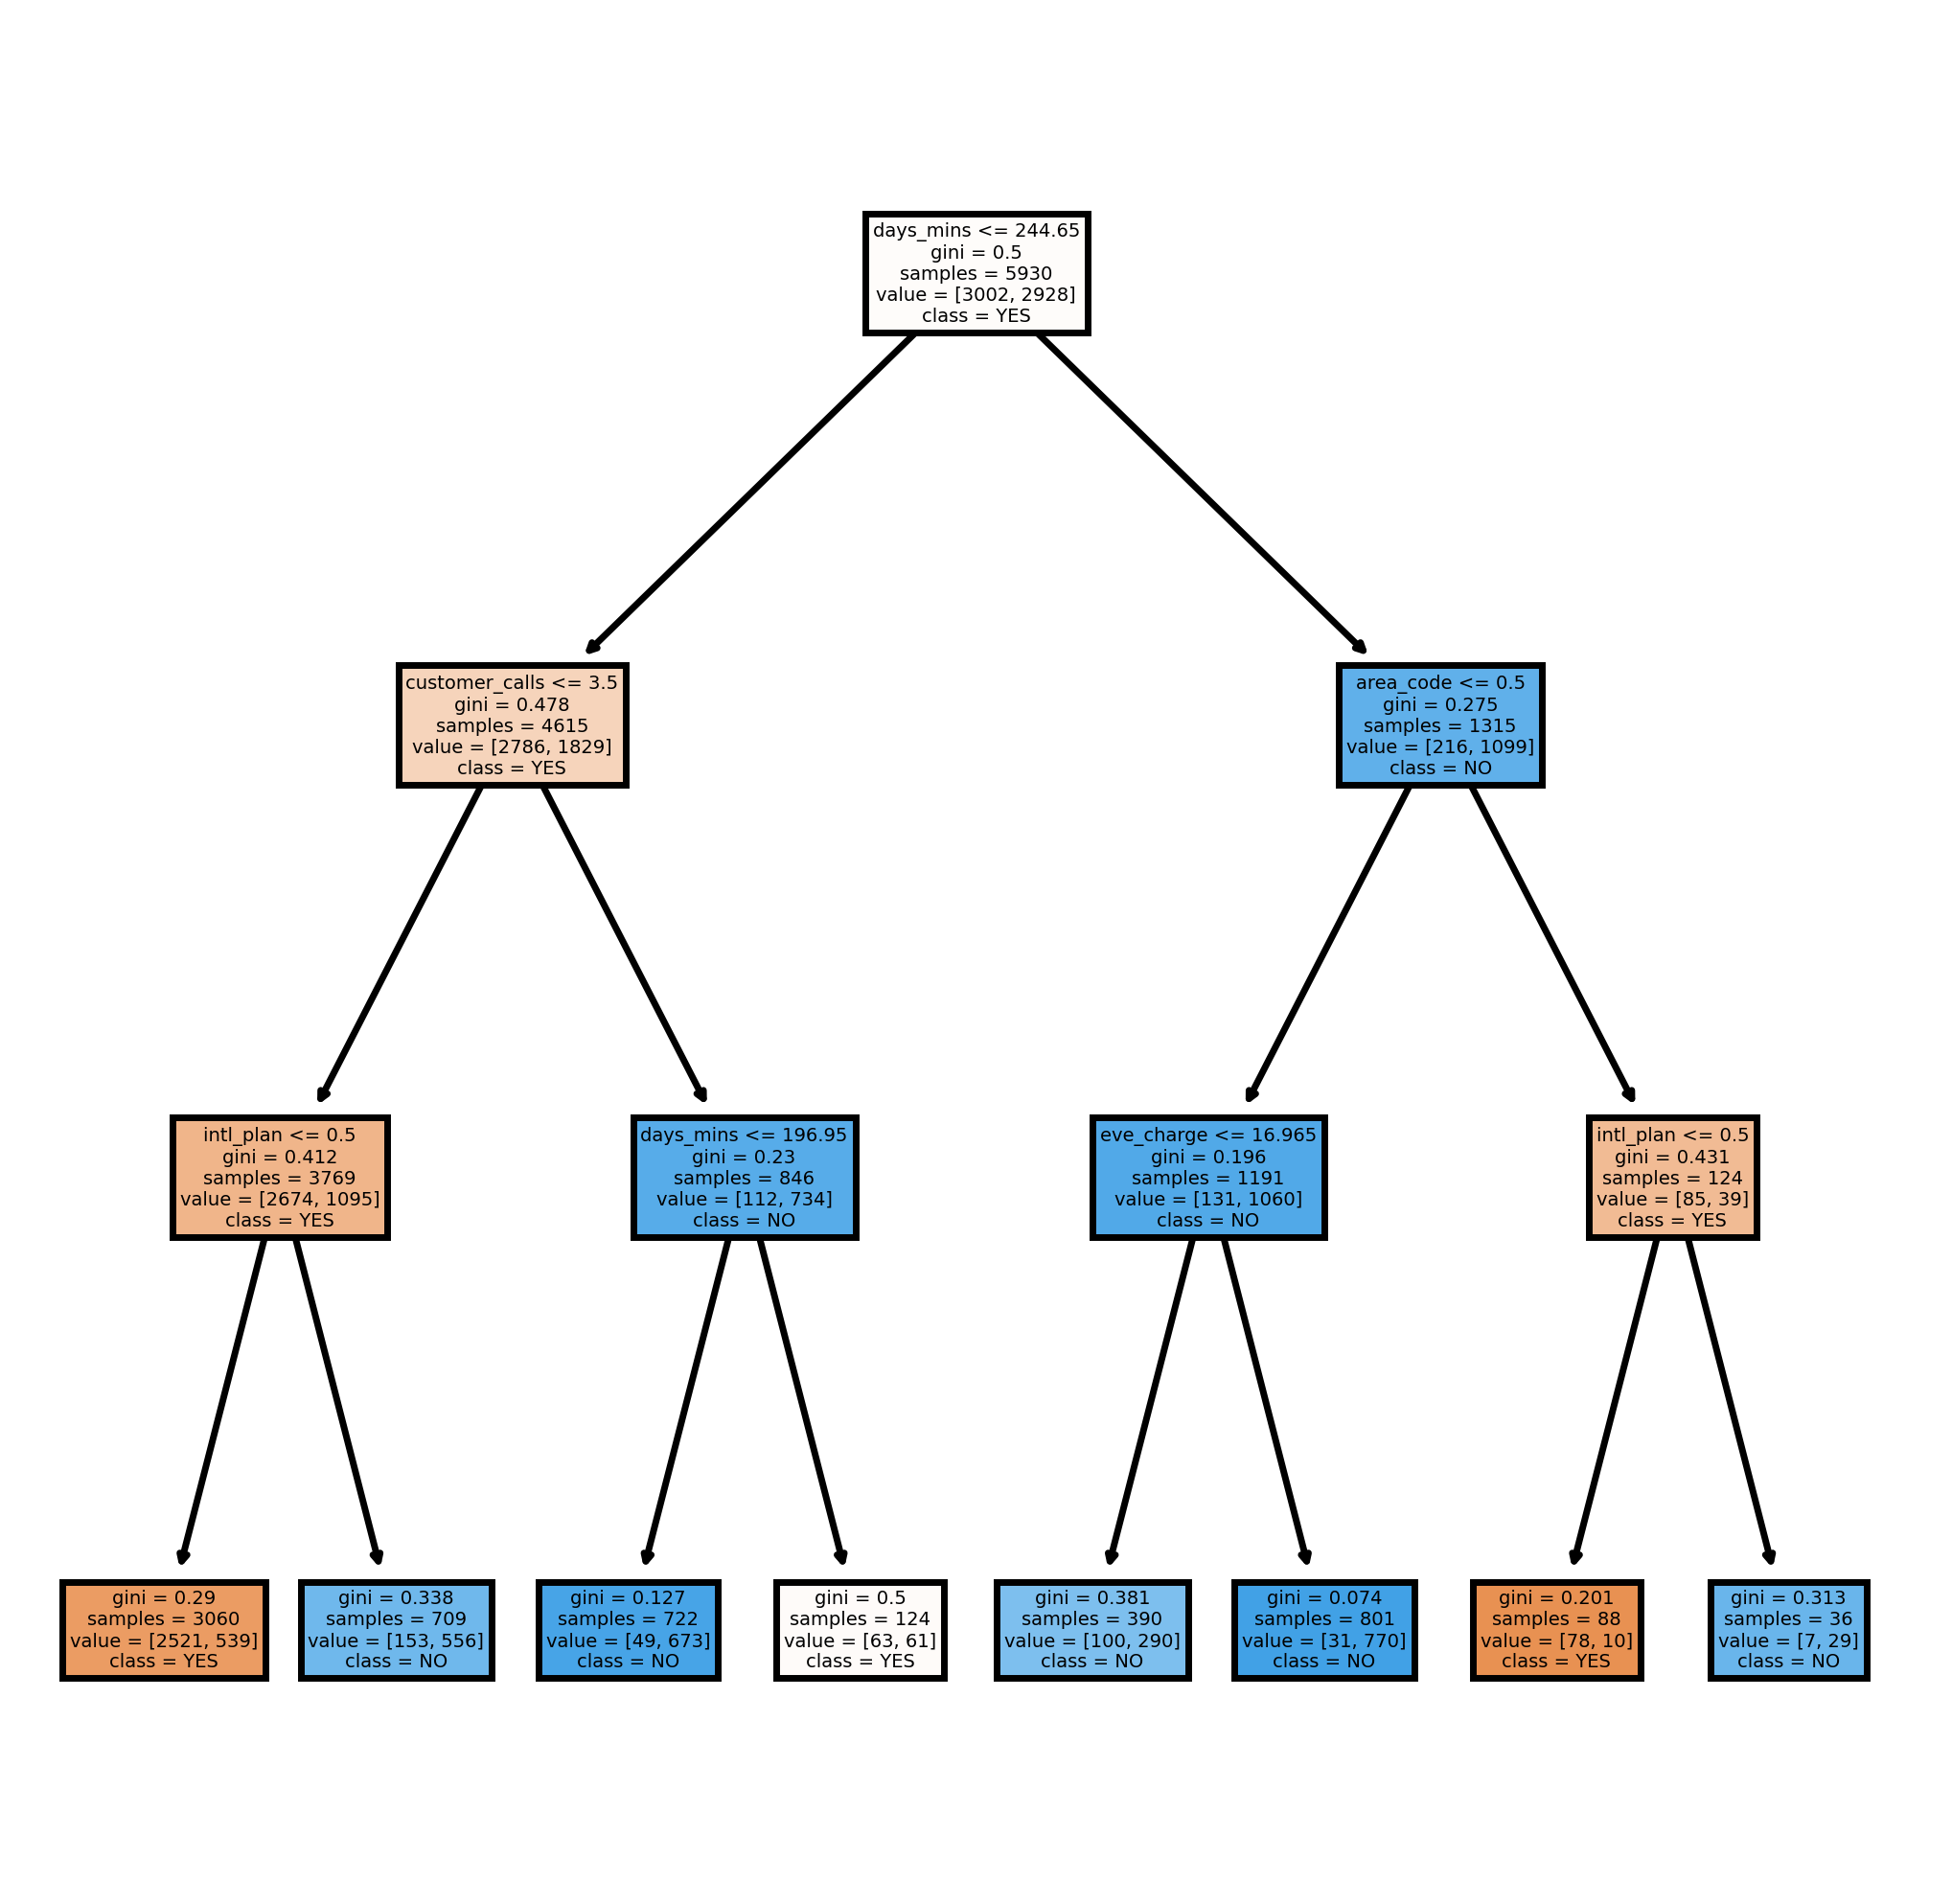

In [77]:
# Visualizing the decision tree with given data
fn=['state', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'ints_charge', 'days_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn']
cn=['YES','NO']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)
tree.plot_tree(model1,feature_names=fn,
              class_names=cn,
              filled=True);

In [78]:
# checking train data score
model1.score(x_train,y_train)

0.8397976391231029

In [79]:
# checking test data score
model1.score(x_test,y_test)

0.8324154209284028

In [80]:
# Predicting with test data
y_pred = model1.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [81]:
# Checking Classification Report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1234
           1       0.87      0.79      0.83      1308

    accuracy                           0.83      2542
   macro avg       0.83      0.83      0.83      2542
weighted avg       0.84      0.83      0.83      2542



In [82]:
# Taking Accuracy
dcsn=accuracy_score(y_test,y_pred)
print('accuracy',dcsn)

accuracy 0.8324154209284028


In [83]:
# Taking Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1080,  154],
       [ 272, 1036]], dtype=int64)

### Model Building using Random Forest

In [84]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the classifier
model2= RandomForestClassifier(n_estimators=110,max_features=3)

In [85]:
# Fitting to training set
model2.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [86]:
# Predicting for test labels
y_pred=model2.predict(x_test)

In [87]:
# checking train data score
model2.score(x_train,y_train)

1.0

In [88]:
# checking test data score
model2.score(x_test,y_test)

0.9893784421715185

In [89]:
#print classification report for model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1234
           1       0.98      1.00      0.99      1308

    accuracy                           0.99      2542
   macro avg       0.99      0.99      0.99      2542
weighted avg       0.99      0.99      0.99      2542



In [90]:
# Taking Accuracy
rndm=accuracy_score(y_test,y_pred)
print('accuracy:',rndm)

accuracy: 0.9893784421715185


In [91]:
# Taking Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1208,   26],
       [   1, 1307]], dtype=int64)

In [92]:
x_train

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
4371,1,1,66,1,31,0,9.7,5,2.62,163.2,106,27,267,108,22.77,172.6,100,7.77,1
1614,1,1,101,1,28,0,10.7,5,2.89,105.9,132,18,231,107,19.69,281.3,120,12.66,1
3328,0,0,79,0,0,0,7.4,4,2.00,121.3,112,20,282,107,24.04,123.1,83,5.54,1
295,0,0,122,0,0,0,11.4,3,3.08,296.4,99,50,214,89,18.26,133.9,107,6.03,4
3237,0,0,39,0,0,0,13.2,5,3.56,187.2,110,31,114,116,9.75,104.7,83,4.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,0,0,131,0,0,0,9.9,5,2.67,166.5,129,28,210,107,17.87,257.2,93,11.57,1
7880,0,0,117,0,0,0,13.6,3,3.67,118.4,126,20,249,97,21.19,227.0,56,10.22,5
7270,1,1,84,1,25,0,12.9,8,3.48,113.9,90,19,257,99,21.85,214.5,98,9.65,4
6524,0,0,137,0,0,0,11.5,4,3.11,111.8,106,19,281,89,23.96,233.0,93,10.49,4


In [93]:
x_test

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,ints_charge,days_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
3883,1,1,68,1,41,0,11.5,2,3.11,226.0,113,38,149,115,12.73,184.9,88,8.32,2
2698,0,0,117,0,0,0,7.7,10,2.08,158.7,84,26,181,91,15.44,177.3,67,7.98,2
6796,0,0,117,0,0,0,13.6,3,3.67,118.4,126,20,249,97,21.19,227.0,56,10.22,5
8173,0,0,47,0,0,1,13.3,7,3.59,47.8,120,8,178,123,15.21,152.6,96,6.87,0
7873,0,0,144,0,0,0,11.6,5,3.13,278.5,95,47,240,90,20.46,120.0,90,5.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1,1,110,1,38,0,9.7,6,2.62,236.3,102,40,195,112,16.65,183.5,82,8.26,1
3035,0,0,78,0,0,0,8.6,9,2.32,163.6,88,27,283,93,24.09,262.1,108,11.79,0
6335,1,1,95,1,41,1,10.3,9,2.78,136.8,91,23,200,61,17.07,133.7,67,6.02,5
2279,0,0,110,0,0,0,9.8,5,2.65,271.1,108,46,237,122,20.15,239.9,122,10.80,2


### Model Building Using Log Reg

In [94]:
# Importing Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

In [95]:
# Model Building
model3=LogisticRegression()

In [96]:
# Fitting to training set
model3.fit(x_train,y_train)

LogisticRegression()

In [97]:
# Predicting the test lables
y_pred=model3.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [98]:
# checking train data score
model3.score(x_train,y_train)

0.733389544688027

In [99]:
# checking test data score
model3.score(x_test,y_test)

0.7376081825334382

In [100]:
# Checking Classification Report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      3002
           1       0.73      0.74      0.73      2928

    accuracy                           0.73      5930
   macro avg       0.73      0.73      0.73      5930
weighted avg       0.73      0.73      0.73      5930



In [101]:
# Taking Accuracy
log=accuracy_score(y_train,y_pred)
print('accuracy',log)

accuracy 0.733389544688027


In [102]:
# Taking Confusion Matrix
cm=confusion_matrix(y_train,y_pred)
cm

array([[2188,  814],
       [ 767, 2161]], dtype=int64)

#### Plotting AUC and ROC Curve

In [103]:
# Calculating auc score
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_pred)
auc

ValueError: Found input variables with inconsistent numbers of samples: [2542, 5930]

In [104]:
auc= roc_auc_score(y_test,y_pred)

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test,y_pred)

plt.figure(figsize=(10,8),dpi=100)
plt.plot(false_positive_rate, true_positive_rate, "darkblue")
plt.fill_between(false_positive_rate, true_positive_rate, facecolor="chartreuse",alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2542, 5930]

### Model Building Using Adaboost Classifer

In [105]:
# importing Adaboost Classifer
from sklearn.ensemble import AdaBoostClassifier
# Model Building
model4= AdaBoostClassifier()

In [106]:
# Fitting to training set
model4.fit(x_train,y_train)

AdaBoostClassifier()

In [107]:
# Predicting the test lables
y_pred= model4.predict(x_test)

In [108]:
#print classification report for model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1234
           1       0.86      0.83      0.84      1308

    accuracy                           0.84      2542
   macro avg       0.84      0.84      0.84      2542
weighted avg       0.84      0.84      0.84      2542



In [109]:
# Taking Accuracy
ada=accuracy_score(y_test,y_pred)
print('accuracy',ada)

accuracy 0.8391030684500393


In [110]:
# Taking Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1053,  181],
       [ 228, 1080]], dtype=int64)

### Model Building Using XG Boost

In [111]:
from sklearn.naive_bayes import GaussianNB

In [112]:
gnb=GaussianNB()
gnbmodel=gnb.fit(x_train,y_train)

In [113]:
y_pred=gnbmodel.predict(x_test)

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1234
           1       0.77      0.83      0.80      1308

    accuracy                           0.78      2542
   macro avg       0.78      0.78      0.78      2542
weighted avg       0.78      0.78      0.78      2542



In [115]:
ganb=accuracy_score(y_test,y_pred)
print('Accuracy:',ganb)

Accuracy: 0.7820613690007868


In [116]:
acy=pd.DataFrame({'Models':['Decision Tree','Random Forest','Log','adaboost','Gaussian'],
                'Accuracies':[dcsn,rndm,log,ada,ganb]})
acy

,Models,Accuracies
0,Decision Tree,0.832415
1,Random Forest,0.989378
2,Log,0.733390
3,adaboost,0.839103
4,Gaussian,0.782061


Here Random Forest has the highest precision,recall and accuracies.Hence we choose Random Forest as our model

In [117]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [118]:
import joblib
import streamlit as st

In [119]:
filename = 'model_final.sav'
joblib.dump(model2,filename)

['model_final.sav']